# SVM (Support Vector Machines)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

Read in training data:

In [2]:
X_train = pd.read_csv('../data/train/X_train.csv')
y_train = np.ravel(pd.read_csv('../data/train/y_train.csv'))

### Model creation and training:

In [3]:
params = {
    "kernel" : ["linear","rbf"],
    "C" : [0.1, 0.5, 1, 5]
}

svm_grid = GridSearchCV(svm.SVC(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
svm_grid.fit(X_train, y_train)

print('Best accuracy : {:.3f}'.format(svm_grid.best_score_))
print('Best hyperparameters : {}\n'.format(svm_grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best accuracy : 0.933
Best hyperparameters : {'C': 5, 'kernel': 'linear'}



In [4]:
model = svm.SVC(C=1.0, kernel='linear', degree=3, probability=True)
model.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

### Prediction on training set:

In [5]:
y_train_pred = model.predict(X_train)

In [6]:
print('Confusion matrix: \n', confusion_matrix(y_train, y_train_pred))
print('\nClassification report: \n', classification_report(y_train, y_train_pred, zero_division=True))

Confusion matrix: 
 [[181   0]
 [  0 220]]

Classification report: 
               precision    recall  f1-score   support

      Modern       1.00      1.00      1.00       181
 Renaissance       1.00      1.00      1.00       220

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



### Testing model:

Read in test data:

In [7]:
X_test = pd.read_csv('../data/test/X_test.csv')
y_test = np.ravel(pd.read_csv('../data/test/y_test.csv'))
# y_test

In [8]:
y_test_pred = model.predict(X_test)
# y_test_pred

In [9]:
print('Confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('\nClassification report: \n', classification_report(y_test, y_test_pred, zero_division=True))

Confusion matrix: 
 [[74  3]
 [ 2 93]]

Classification report: 
               precision    recall  f1-score   support

      Modern       0.97      0.96      0.97        77
 Renaissance       0.97      0.98      0.97        95

    accuracy                           0.97       172
   macro avg       0.97      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172



#### Saving predictions and probablilities for model comparison:

In [10]:
pd.DataFrame(y_test_pred).to_csv('results/svm_pred.csv', index=False)
pd.DataFrame(model.predict_proba(X_test)[:,1]).to_csv('results/svm_prob.csv', index=False)

### ROC curve - for test and train data

In [11]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [12]:
#test data
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
test_score = round(roc_auc_score(y_test, y_score1), 2)
#train data
y_score2 = model.predict_proba(X_train)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_train, y_score2)
val_score = round(roc_auc_score(y_train, y_score2), 2)

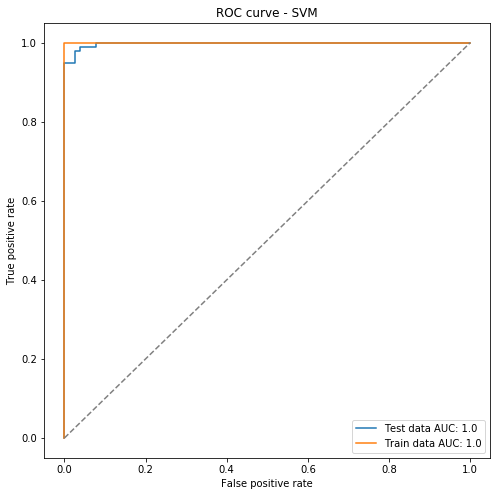

In [13]:
plt.subplots(1, figsize=(8,8))
plt.title('ROC curve - SVM')
#roc curve for test data
plt.plot(false_positive_rate1, true_positive_rate1, label="Test data AUC: " + str(test_score))
#roc curve for train data
plt.plot(false_positive_rate2, true_positive_rate2, label="Train data AUC: " + str(val_score))
plt.plot([0, 1], ls="--", color='gray')
plt.legend(loc='lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()